In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# CNN

In [2]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Conv1D, Embedding, AveragePooling1D, Flatten, MaxPooling1D, GRU, LSTM, SimpleRNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Nadam
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import pickle

In [6]:
(x_train, y_train), (x_test, y_test) = imdb.load_data()

vocab_size = 10000
maxLen = 500

(x_train, y_train), (x_test, y_test) = imdb.load_data(path="imbd.npz",
                                                      num_words=vocab_size,
                                                      skip_top=0,
                                                      maxlen=maxLen,
                                                      seed=113,
                                                      start_char=1,
                                                      oov_char=2,
                                                      index_from=3)

x_train = sequence.pad_sequences(x_train, maxlen=maxLen)
x_test = sequence.pad_sequences(x_test, maxlen=maxLen)

In [7]:
model1 = Sequential([
    # Embedding
    Embedding(input_dim=vocab_size, output_dim=128, input_shape=(500,), name="Input"),
    
    # Convolutional Portion
    Conv1D(filters=1000,kernel_size=5, activation='relu', kernel_regularizer='l1', name="Convolution1"), #filters=32, kernel_size=7
    MaxPooling1D(pool_size=5, name="MaxPool1"),
    Dropout(0.2),
    Conv1D(filters=2000,kernel_size=5, activation='relu', name="Convolution2"), #filters=32, kernel_size=7
    MaxPooling1D(pool_size=5, name="MaxPool2"),
    Flatten(),
    
    # Fully Connected Portion
    Dense(1000, activation='relu', name="Dense1"),
    Dense(500, activation='relu', name="Dense2"),
    Dense(200, activation='relu', name="Dense3"),
    Dense(1, activation='sigmoid', name="Output")])

# Optimization algorithm and model compilation
opt = Adam(learning_rate=0.000005)
model1.compile(optimizer=opt, loss='binary_crossentropy', metrics=["accuracy"])

In [ ]:
model1.layers

In [8]:
history1 = model1.fit(x_train, y_train, batch_size=32, epochs=20, validation_data=(x_test, y_test))
#history1 = model1.fit(x_train, y_train, epochs=30, validation_data=(x_test, y_test))

Epoch 1/20
716/716 [==============================] - 70s 96ms/step - loss: 94.0311 - accuracy: 0.5085 - val_loss: 83.3808 - val_accuracy: 0.5135
Epoch 2/20
716/716 [==============================] - 69s 97ms/step - loss: 73.6254 - accuracy: 0.5186 - val_loss: 64.2394 - val_accuracy: 0.5228
Epoch 3/20
716/716 [==============================] - 70s 98ms/step - loss: 55.7385 - accuracy: 0.5280 - val_loss: 47.6150 - val_accuracy: 0.5138
Epoch 4/20
716/716 [==============================] - 71s 99ms/step - loss: 40.3646 - accuracy: 0.5585 - val_loss: 33.5026 - val_accuracy: 0.5223
Epoch 5/20
716/716 [==============================] - 70s 98ms/step - loss: 27.4981 - accuracy: 0.6136 - val_loss: 21.8900 - val_accuracy: 0.6662
Epoch 6/20
716/716 [==============================] - 71s 99ms/step - loss: 17.1574 - accuracy: 0.6834 - val_loss: 12.8396 - val_accuracy: 0.7173
Epoch 7/20
716/716 [==============================] - 76s 106ms/step - loss: 9.4315 - accuracy: 0.7489 - val_loss: 6.4779 - 

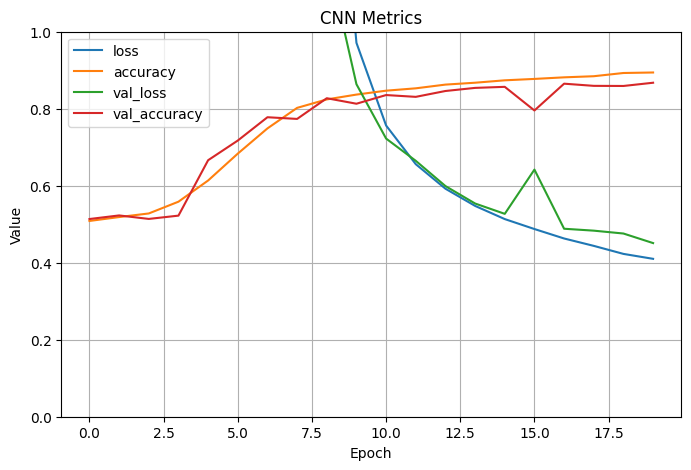

In [9]:
fig = pd.DataFrame(history1.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.ylabel("Value")
plt.xlabel("Epoch")
plt.title("CNN Metrics")
plt.show()

In [ ]:
model1.save("imdb_CNN_1.keras")
fileObj = open('history1_1.obj', 'wb')
pickle.dump(history1,fileObj)
fileObj.close()

# RNN

In [52]:
(x_train, y_train), (x_test, y_test) = imdb.load_data()

vocab_size = 10000
maxLen = 1000

(x_train, y_train), (x_test, y_test) = imdb.load_data(path="imbd.npz",
                                                      num_words=vocab_size,
                                                      skip_top=500,
                                                      maxlen=maxLen,
                                                      seed=113,
                                                      start_char=1,
                                                      oov_char=2,
                                                      index_from=3)

x_train = sequence.pad_sequences(x_train, maxlen=maxLen)#, maxlen=maxLen)  # maxLen)
x_test = sequence.pad_sequences(x_test, maxlen=maxLen)#, maxlen=maxLen)    # maxLen)

In [66]:
model2 = Sequential([
    Embedding(vocab_size, 128, input_shape=(maxLen,)),
    GRU(50, return_sequences=True, activation='tanh', kernel_initializer='he_normal'),# bias_regularizer='l1'),
    # GRU(50, return_sequences=True, activation='tanh', kernel_regularizer='l1'),# kernel_regularizer='l2'),
    GRU(50, activation='tanh', kernel_initializer='he_normal'),# kernel_regularizer='l1'),# kernel_regularizer='l2'),
    Dense(1, activation="sigmoid")
])

opt = Adam(learning_rate=0.00001)
model2.compile(optimizer=opt, loss='binary_crossentropy', metrics=["accuracy"])

In [39]:
model2.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_18 (Embedding)    (None, 500, 128)          1280000   
                                                                 
 gru_35 (GRU)                (None, 500, 50)           27000     
                                                                 
 gru_36 (GRU)                (None, 500, 50)           15300     
                                                                 
 gru_37 (GRU)                (None, 50)                15300     
                                                                 
 dense_18 (Dense)            (None, 1)                 51        
                                                                 
Total params: 1,337,651
Trainable params: 1,337,651
Non-trainable params: 0
_________________________________________________________________


In [67]:
history2 = model2.fit(x_train, y_train, batch_size=64, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
389/389 [==============================] - 48s 113ms/step - loss: 0.6928 - accuracy: 0.5083 - val_loss: 0.6923 - val_accuracy: 0.5263
Epoch 2/20
389/389 [==============================] - 41s 105ms/step - loss: 0.6917 - accuracy: 0.5469 - val_loss: 0.6915 - val_accuracy: 0.5448
Epoch 3/20
389/389 [==============================] - 42s 107ms/step - loss: 0.6905 - accuracy: 0.5650 - val_loss: 0.6906 - val_accuracy: 0.5655
Epoch 4/20
389/389 [==============================] - 42s 107ms/step - loss: 0.6891 - accuracy: 0.5887 - val_loss: 0.6894 - val_accuracy: 0.5767
Epoch 5/20
389/389 [==============================] - 42s 109ms/step - loss: 0.6872 - accuracy: 0.6068 - val_loss: 0.6878 - val_accuracy: 0.5832
Epoch 6/20
389/389 [==============================] - 40s 104ms/step - loss: 0.6846 - accuracy: 0.6224 - val_loss: 0.6855 - val_accuracy: 0.5862
Epoch 7/20
389/389 [==============================] - 43s 110ms/step - loss: 0.6810 - accuracy: 0.6394 - val_loss: 0.6822 - val_ac

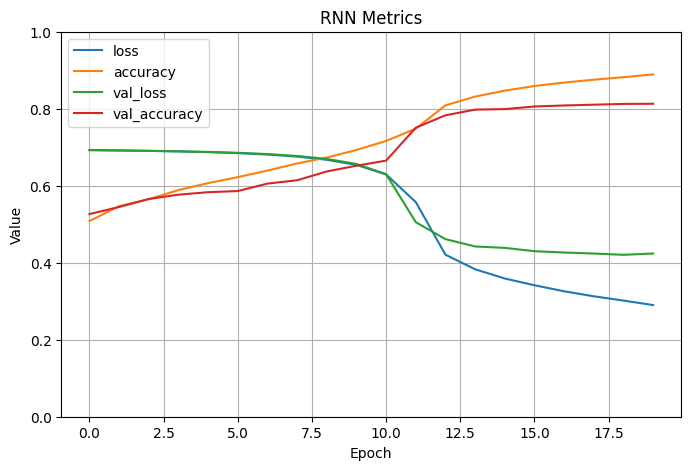

In [68]:
fig = pd.DataFrame(history2.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.ylabel("Value")
plt.xlabel("Epoch")
plt.title("RNN Metrics")
plt.show()

In [69]:
model2.save("imdb_RNN_1.keras")
fileObj = open('history2.obj', 'wb')
pickle.dump(history2,fileObj)
fileObj.close()

INFO:tensorflow:Assets written to: ram://643dfdb1-5427-4491-a4c6-a431898a2837/assets


INFO:tensorflow:Assets written to: ram://643dfdb1-5427-4491-a4c6-a431898a2837/assets
